# Deciding Depot Location

This notebook contains the example code provided in the assignment text, with each task separated into its own cell.

Once you have written the appropriate code for a particular task, you should be able to run the corresponding cell to reproduce the example output.

This notebook assumes that:

- Your code (`country.py` and `utilities.py`) files are located in the same directory as this notebook.
- The `locations.csv` data file that we provided can be found at the relative path `./data/locations.csv` from the directory that this notebook is stored in.

If neither of these are correct, you will need to adjust the setup cell with the correct paths.

Remember that subsequent cells are dependent on cells that came before, so you will need to run the cells in this notebook **in sequence** from top to bottom. You can also use the "restart and run all" option to run the entire notebook from the beginning, in order - though you will get errors in those cells you haven't written the code for yet.

In [3]:
# If you have moved the locations.csv file, you will need to update this variable
from pathlib import Path
locations_csv_file = Path("./data/locations.csv").resolve()

import numpy as np

default_speed = 4.75
# Travelling this distance without any penalties at the default speed should take 1 hour.
one_hour_distance = 3_600 * default_speed

## A Function for Travel Time

In [2]:
from country import travel_time

print(f"Travelling at the default speed: {travel_time(one_hour_distance, 0., 3.):2.1f} h")
print(f"Travelling at half default speed: {travel_time(one_hour_distance, 0., 0., speed = default_speed / 2.):2.1f} h")
print(f"Travel at default speed but with a region penalty that equates to 3:  {travel_time(one_hour_distance, 1., 20.):2.1f} h")

Travelling at the default speed: 1.0 h
Travelling at half default speed: 2.0 h
Travel at default speed but with a region penalty that equates to 3:  3.0 h


## The `Location` Class

In [2]:
from country import Location

riverwood = Location("Riverwood", "Whiterun Hold", 49_877.15654485528,-1.1153081421843865, False)
heartwood_mill = Location("Heartwood Mill", "The Rift", 164_031.25924652288,-0.6236682227787959, True)

In [4]:
bad_name = Location("noT CAPitalised", "Region", 0., 0., False)
print(f"After creation, name is now: {bad_name.name}")

After creation, name is now: Not Capitalised


C:\Users\ymm\Desktop\providedCode\depot_locations\country.py:138: UserWarning: Name was capitalized from 'noT CAPitalised' to 'Not Capitalised'
  warnings.warn(f"Name was capitalized from '{name}' to '{proper_name}'")
C:\Users\ymm\Desktop\providedCode\depot_locations\country.py:140: UserWarning: The name should have each word in them capitalised, and remaining characters in each word should be lowercase.
  warnings.warn(


In [5]:
print(f"Before changing depot: {heartwood_mill.settlement}")
heartwood_mill.depot = False
print(f"After changing depot: {heartwood_mill.settlement}")

bad_name = Location("noT CAPitalised", "Region", 0.0, 0.0, False)
print(f"After creation, name is now: {bad_name.name}")

Before changing depot: False
After changing depot: True
After creation, name is now: Not Capitalised


In [6]:
# Attempting to set the settlement property directly should throw an error.
try:
    heartwood_mill.settlement = False
    print("If you are seeing this in the output, no error was raised!")
except Exception as e:
    print("Attempting to assign to the settlement property raised the following error:")
    print(f"\t{e}")

Attempting to assign to the settlement property raised the following error:
	can't set attribute


In [7]:
riverwood = Location("Riverwood", "Whiterun Hold", 49_877.15654485528,-1.1153081421843865, False)
heartwood_mill = Location("Heartwood Mill", "The Rift", 164_031.25924652288,-0.6236682227787959, True)

print(f"Riverwood's information: {riverwood}")
print(f"Heartwood Mill's information: {heartwood_mill}")

Riverwood's information: Riverwood [settlement] in Whiterun Hold @ (49877.16m, -0.36pi)
Heartwood Mill's information: Heartwood Mill [depot] in The Rift @ (164031.26m, -0.2pi)


In [8]:
RW_to_HM = riverwood.distance_to(heartwood_mill)
print(f"Distance from Riverwood to Heartwood Mill: {RW_to_HM}")

Distance from Riverwood to Heartwood Mill: 122348.57630965716


In [9]:
print(riverwood == riverwood)
print(riverwood == heartwood_mill)

# Do not forget that this task requires you to write a section in your report.

True
False


## The `Country` Class

In [4]:
from country import Country

riverwood = Location("Riverwood", "Whiterun Hold", 49_877.15654485528,-1.1153081421843865, False)
heartwood_mill = Location("Heartwood Mill", "The Rift", 164_031.25924652288,-0.6236682227787959, True)
karthwasten = Location("Karthwasten", "The Reach", 138_231.89539682947,2.858973382047493, True)
whiterun = Location("Whiterun", "Whiterun Hold", 21_197.215713390284,-0.3577712724508101, False)
list_of_locations = [riverwood, heartwood_mill, karthwasten, whiterun]
country = Country(list_of_locations)

print("List of locations passed in:")
for loc in list_of_locations:
    print(f"\t{loc}")
assert isinstance(country._all_locations, tuple), "Locations are not stored as a tuple in the Country class"
assert set(country._all_locations) == set(list_of_locations), "Provided entries and those stored aren't the same"

List of locations passed in:
	Riverwood [settlement] in Whiterun Hold @ (49877.16m, -0.36pi)
	Heartwood Mill [depot] in The Rift @ (164031.26m, -0.2pi)
	Karthwasten [depot] in The Reach @ (138231.9m, 0.91pi)
	Whiterun [settlement] in Whiterun Hold @ (21197.22m, -0.11pi)


In [5]:
from utilities import read_country_data

skyrim = read_country_data(locations_csv_file)

Number of settlements in Skyrim: 14
List of those settlements:
	Kynesgrove [settlement] in Eastmarch @ (135427.25m, 0.03pi)
	Windhelm [settlement] in Eastmarch @ (139639.42m, 0.08pi)
	Falkreath [settlement] in Falkreath Hold @ (91448.22m, -0.61pi)
	Helgen [settlement] in Falkreath Hold @ (81145.25m, -0.44pi)
	Dragon Bridge [settlement] in Haafingar @ (131554.64m, 0.78pi)
	Solitude [settlement] in Haafingar @ (123161.67m, 0.68pi)
	Dawnstar [settlement] in The Pale @ (110518.81m, 0.41pi)
	Markarth [settlement] in The Reach @ (174103.32m, 0.99pi)
	Ivarstead [settlement] in The Rift @ (99814.2m, -0.22pi)
	Riften [settlement] in The Rift @ (198505.22m, -0.16pi)
	Riverwood [settlement] in Whiterun Hold @ (49877.16m, -0.36pi)
	Rorikstead [settlement] in Whiterun Hold @ (84588.16m, 0.97pi)
	Whiterun [settlement] in Whiterun Hold @ (21197.22m, -0.11pi)
	Winterhold [settlement] in Winterhold @ (150024.63m, 0.24pi)
Number of depots in Skyrim: 5
List of those depots:
	Darkwater Crossing [depot] in

C:\Users\ymm\Desktop\providedCode\depot_locations\plotting_utilities.py:103: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(
C:\Users\ymm\Desktop\providedCode\depot_locations\plotting_utilities.py:130: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\ymm\AppData\Local\Temp\ipykernel_7848\119601068.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  skyrim_map.show()


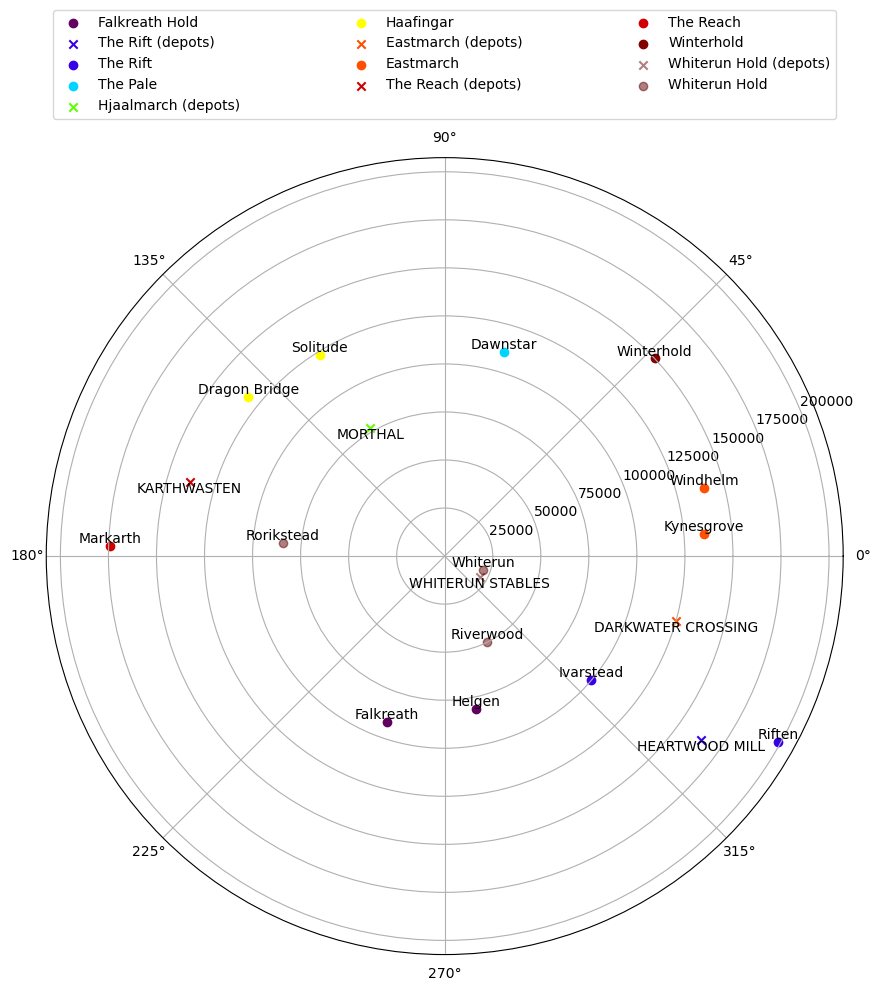

In [6]:
print(f"Number of settlements in Skyrim: {skyrim.n_settlements}")
print("List of those settlements:")
for settlement in skyrim.settlements:
  print(f"\t{settlement}")
print(f"Number of depots in Skyrim: {skyrim.n_depots}")
print("List of those depots:")
for depot in skyrim.depots:
  print(f"\t{depot}")

skyrim_map = skyrim.plot_country()
skyrim_map.show()

In [13]:
RW_to_HM_time = skyrim.travel_time(riverwood, heartwood_mill)
HM_to_RW_time = skyrim.travel_time(heartwood_mill, riverwood)

print(f"Travel time from Riverwood to Heartwood Mill: {RW_to_HM_time}")
print(f"Travel time from Heartwood Mill to Riverwood: {HM_to_RW_time}")

kvatch = Location("Kvatch", "Cyrodiil", 175_000, -3. * np.pi / 4., False)
try:
  skyrim.travel_time(riverwood, kvatch)
  print("If you see this message in the output, no error was raised!")
except Exception as e:
  print("Attempting to determine travel time to a location not in the country threw an error:")
  print(f"\t{e}")

Travel time from Riverwood to Heartwood Mill: 9.30135375453534
Travel time from Heartwood Mill to Riverwood: 10.016842504884211
Attempting to determine travel time to a location not in the country threw an error:
	Kvatch [settlement] in Cyrodiil @ (175000.0m, -0.75pi) is not in the Country.


In [18]:
# Of all the settlements in the country, find the one that has the shortest travel time from Riverwood
print(f"Using default args: {skyrim.fastest_trip_from(riverwood)}")
# Only consider the locations in skyrim.settlements[0, 1, 3, 4]
print(f"Selecting settlements: {skyrim.fastest_trip_from(riverwood, [0, 1, 3, 4])}")
# Only consider the locations provided explicitly
print(f"Providing explicit locations: {skyrim.fastest_trip_from(riverwood, [heartwood_mill, whiterun])}")
# Mix-and-match locations and indices
print(f"Mix and match selection: {skyrim.fastest_trip_from(riverwood, [0, whiterun, 2, 3, heartwood_mill])}")

Using default args: (Whiterun [settlement] in Whiterun Hold @ (21197.22m, -0.11pi), 2.1887237846155494)
Selecting settlements: (Helgen [settlement] in Falkreath Hold @ (81145.25m, -0.44pi), 2.465731650791503)
Providing explicit locations: (Whiterun [settlement] in Whiterun Hold @ (21197.22m, -0.11pi), 2.1887237846155494)
Mix and match selection: (Whiterun [settlement] in Whiterun Hold @ (21197.22m, -0.11pi), 2.1887237846155494)


Time to complete tour starting in Heartwood Mill: 101.60 h
The tour path was:
	Heartwood Mill [depot] in The Rift @ (164031.26m, -0.2pi)
	Riften [settlement] in The Rift @ (198505.22m, -0.16pi)
	Ivarstead [settlement] in The Rift @ (99814.2m, -0.22pi)
	Helgen [settlement] in Falkreath Hold @ (81145.25m, -0.44pi)
	Falkreath [settlement] in Falkreath Hold @ (91448.22m, -0.61pi)
	Riverwood [settlement] in Whiterun Hold @ (49877.16m, -0.36pi)
	Whiterun [settlement] in Whiterun Hold @ (21197.22m, -0.11pi)
	Rorikstead [settlement] in Whiterun Hold @ (84588.16m, 0.97pi)
	Dragon Bridge [settlement] in Haafingar @ (131554.64m, 0.78pi)
	Solitude [settlement] in Haafingar @ (123161.67m, 0.68pi)
	Dawnstar [settlement] in The Pale @ (110518.81m, 0.41pi)
	Winterhold [settlement] in Winterhold @ (150024.63m, 0.24pi)
	Windhelm [settlement] in Eastmarch @ (139639.42m, 0.08pi)
	Kynesgrove [settlement] in Eastmarch @ (135427.25m, 0.03pi)
	Markarth [settlement] in The Reach @ (174103.32m, 0.99pi)
	Heartwo

C:\Users\ymm\Desktop\providedCode\depot_locations\plotting_utilities.py:169: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\ymm\AppData\Local\Temp\ipykernel_7848\2497449796.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  path_map.show()


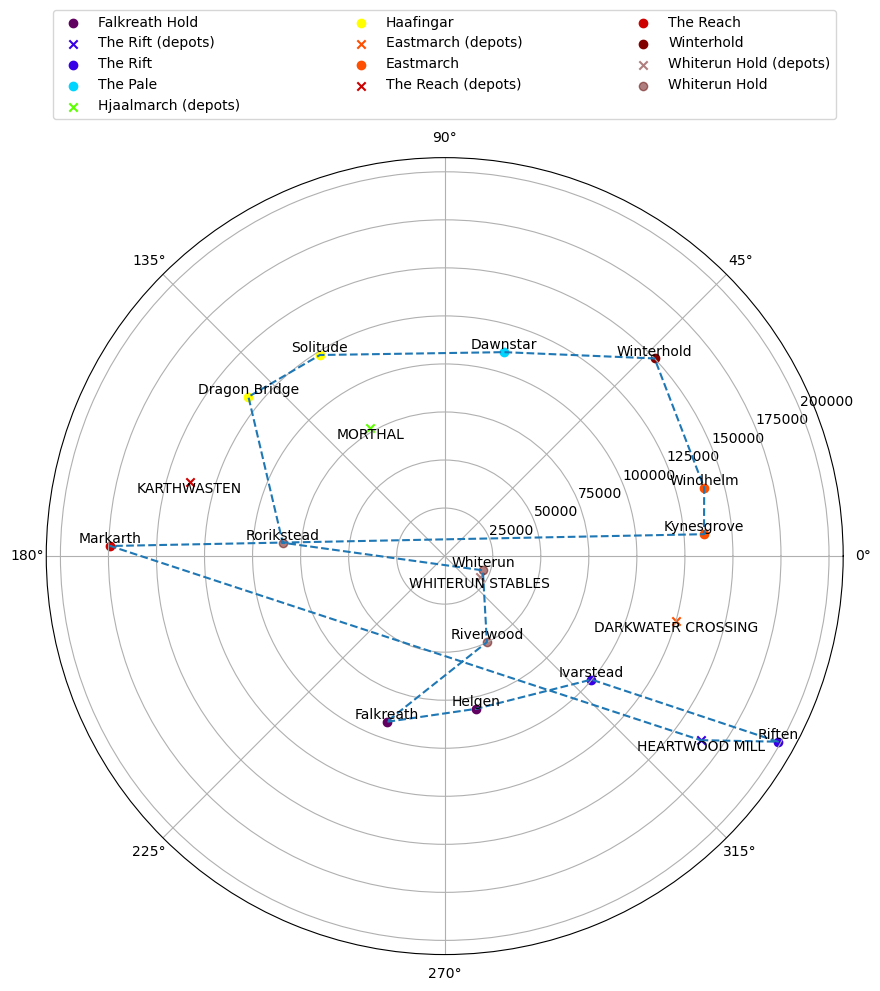

In [7]:
tour_from_heartwood_mill, tour_time = skyrim.nn_tour(heartwood_mill)

print(f"Time to complete tour starting in Heartwood Mill: {tour_time:2.2f} h")
print("The tour path was:")
for loc in tour_from_heartwood_mill:
  print(f"\t{loc}")

path_map = skyrim.plot_path(
    path=tour_from_heartwood_mill,
    polar_projection=True,
)
path_map.show()

In [16]:
# This will produce no output text by itself
best_depot = skyrim.best_depot_site(display=False)

print("The best depot found was:", best_depot)

# This will automatically display some of the information that
# is computed before returning the best depot
print("\nWith display=True however, we get information automatically...\n")
best_depot_again = skyrim.best_depot_site()

assert best_depot_again == best_depot

The best depot found was: Whiterun Stables [depot] in Whiterun Hold @ (21192.68m, -0.17pi)

With display=True however, we get information automatically...

Best depot: Whiterun Stables [depot] in Whiterun Hold @ (21192.68m, -0.17pi)
NNA tour is:
	Whiterun Stables [depot] in Whiterun Hold @ (21192.68m, -0.17pi)
	Whiterun [settlement] in Whiterun Hold @ (21197.22m, -0.11pi)
	Riverwood [settlement] in Whiterun Hold @ (49877.16m, -0.36pi)
	Helgen [settlement] in Falkreath Hold @ (81145.25m, -0.44pi)
	Falkreath [settlement] in Falkreath Hold @ (91448.22m, -0.61pi)
	Ivarstead [settlement] in The Rift @ (99814.2m, -0.22pi)
	Riften [settlement] in The Rift @ (198505.22m, -0.16pi)
	Kynesgrove [settlement] in Eastmarch @ (135427.25m, 0.03pi)
	Windhelm [settlement] in Eastmarch @ (139639.42m, 0.08pi)
	Winterhold [settlement] in Winterhold @ (150024.63m, 0.24pi)
	Dawnstar [settlement] in The Pale @ (110518.81m, 0.41pi)
	Solitude [settlement] in Haafingar @ (123161.67m, 0.68pi)
	Dragon Bridge [sett

## Execution Time for the NNA

Your script should be callable from the command line.
Running the cell below (with this notebook in the folder detailed at the start!) should also run your script as if it had been invoked with

```bash
python execution_time.py
```

Number of Locations: 1, Execution Time: 0.000042 seconds
Number of Locations: 2, Execution Time: 0.000035 seconds
Number of Locations: 3, Execution Time: 0.000070 seconds
Number of Locations: 4, Execution Time: 0.000082 seconds
Number of Locations: 5, Execution Time: 0.000091 seconds
Number of Locations: 6, Execution Time: 0.000202 seconds
Number of Locations: 7, Execution Time: 0.000154 seconds
Number of Locations: 8, Execution Time: 0.000203 seconds
Number of Locations: 9, Execution Time: 0.000265 seconds
Number of Locations: 10, Execution Time: 0.000324 seconds
Number of Locations: 11, Execution Time: 0.000501 seconds
Number of Locations: 12, Execution Time: 0.000483 seconds
Number of Locations: 13, Execution Time: 0.000560 seconds
Number of Locations: 14, Execution Time: 0.000705 seconds
Number of Locations: 16, Execution Time: 0.000868 seconds
Number of Locations: 17, Execution Time: 0.000983 seconds
Number of Locations: 19, Execution Time: 0.001233 seconds
Number of Locations: 20

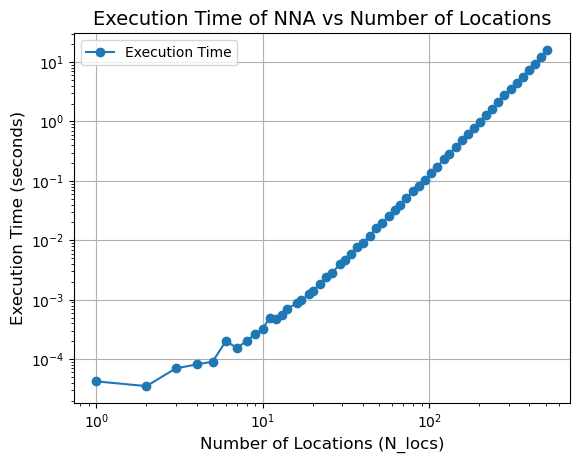

In [17]:
%run -i execution_time.py